<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/4%EC%9D%BC%EC%B0%A8/%ED%99%95%EB%A5%A0%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 연속형과 이산형 확률변수**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.simplefilter("ignore")

[4 4 2 5 4 3 5 1 3 4 1 5 5 1 2 1 4 3 5 1 1 5 6 6 6 1 1 2 6 6 4 4 6 5 6 2 3
 2 3 6 2 4 1 6 3 4 5 1 6 2 5 4 1 6 4 6 2 6 2 3 4 1 3 2 2 4 3 3 3 3 6 5 2 1
 5 5 5 3 1 5 5 5 3 6 5 5 4 3 3 2 3 4 6 6 3 4 6 5 3 1]


<Axes: >

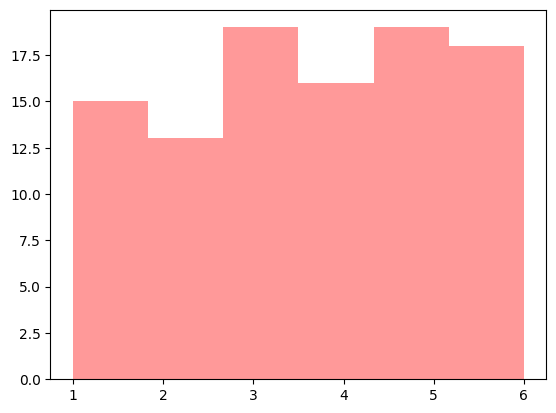

In [ ]:
# 이산 확률변수
x = np.random.randint(low=1, high=7, size=100)
print(x)
sns.distplot(x, hist=True, kde=False, color='r', bins=6, label='Discrete variable')

In [ ]:
# 이산형 확률변수의 평균과 분산
x_mean = np.mean(x)
x_var = np.var(x)

\begin{align*}
E(X) &= \sum_{i=1}^{6} x_i \cdot P(X = x_i) \\
     &= \sum_{i=1}^{6} x_i \cdot \frac{1}{6} \\
     &= \frac{1}{6} (1 + 2 + 3 + 4 + 5 + 6) \\
     &= \frac{1}{6} \cdot 21 \\
     &= 3.5
\end{align*}

\begin{align*}
\text{Var}(X) &= \sum_{i=1}^{6} (x_i - E(X))^2 \cdot P(X = x_i) \\
              &= \frac{1}{6} \left((1 - 3.5)^2 + (2 - 3.5)^2 + (3 - 3.5)^2 + (4 - 3.5)^2 + (5 - 3.5)^2 + (6 - 3.5)^2\right) \\
              &= \frac{1}{6} \left(6.25 + 2.25 + 0.25 + 0.25 + 2.25 + 6.25\right) \\
              &= \frac{1}{6} \cdot 17.5 \\
              &= 2.9167
\end{align*}

<Axes: ylabel='Density'>

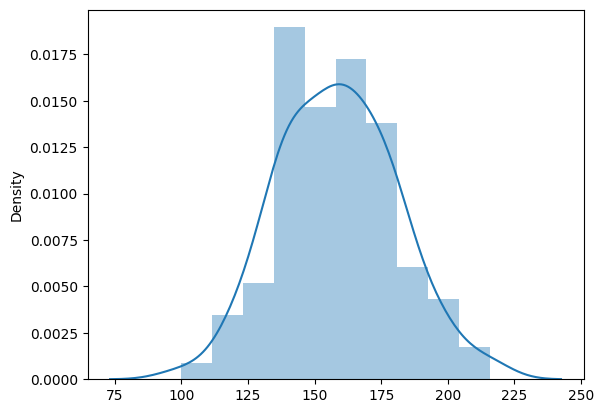

In [ ]:
# 연속형 확률변수
y = np.random.normal(loc=160, scale=20, size=100)
sns.distplot(y, kde=True, bins=10)

In [ ]:
# 연속형 확률변수의 평균과 분산
y_mean = np.mean(y)
y_var = np.var(y)

# 수식 출력
print("이산형 확률변수의 평균:", x_mean)
print("이산형 확률변수의 분산:", x_var)
print("연속형 확률변수의 평균:", y_mean)
print("연속형 확률변수의 분산:", y_var)

이산형 확률변수의 평균: 3.65
이산형 확률변수의 분산: 2.8475
연속형 확률변수의 평균: 158.43947392920248
연속형 확률변수의 분산: 491.0141750477354


# <font color='red'> 1. Types of Distribution

## Bernoulli distribution

(array([456.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 544.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

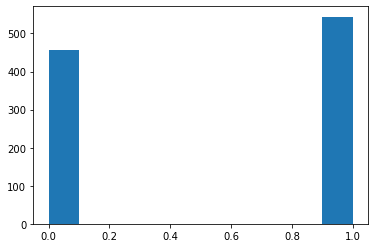

In [ ]:
n, p = 1, 0.5 # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000) # result of flipping a coin, tested 1000 times
plt.hist(s)

[Text(0.5, 0, 'Bernoulli'), Text(0, 0.5, 'Frequency')]

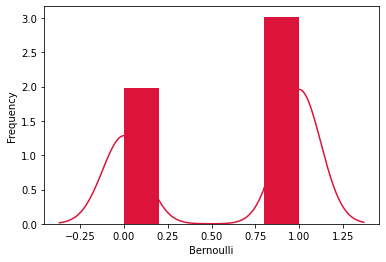

In [ ]:
from scipy.stats import bernoulli

b_data = bernoulli.rvs(size=1000, p =0.6) # ndarray or scalar: Random variates of given size
ax = sns.distplot(b_data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Bernoulli', ylabel='Frequency')

## Geometric distribution

In [ ]:
from scipy.stats import geom

<BarContainer object of 12 artists>

(1.0, 15.0)

Text(0.5, 0, 'n')

Text(0, 0.5, 'p(n)')

Text(0.5, 1.0, 'First Sucess at n')

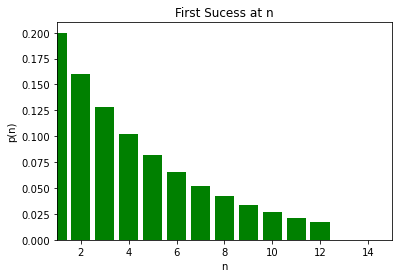

In [ ]:
prob = 0.2
n =12
p = np.zeros(n)
q = np.zeros(n)

for k in range(1, n+1):
    p[k-1] = (1-prob)**(k-1)*prob
    q[k-1] = geom.pmf(k, prob)

plt.bar(range(1,13), p, color='green')
plt.xlim(1, 15)
plt.xlabel('n'); plt.ylabel('p(n)')
plt.title('First Sucess at n')

## Hypergeometric distribution

In [ ]:
from scipy.stats import hypergeom

Suppose we have a collection of 1000 animals, of which 80 are dogs. Then if we want to know the probability of finding a given number of dogs if we choose at random 100 of the 1000 animals, we can initialize a frozen distribution and plot the probability mass function:

In [ ]:
[M, n, N] = [1000, 80, 100]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_dogs = rv.pmf(x)

Text(0.5, 0, '# of dogs in our group of chosen animals')

Text(0, 0.5, 'hypergeom PMF')

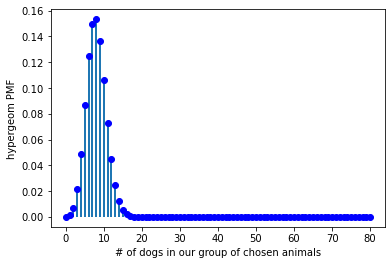

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'bo')
ax.vlines(x, 0, pmf_dogs, lw=2)
ax.set_xlabel('# of dogs in our group of chosen animals')
ax.set_ylabel('hypergeom PMF')
plt.show()

## Poisson distribution

In [ ]:
from scipy.stats import poisson

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

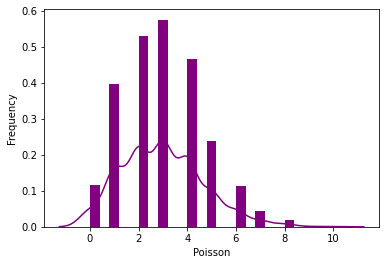

In [ ]:
p_data = poisson.rvs(mu=3, size=1000)
ax = sns.distplot(p_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

## Binomial distribution

In [ ]:
from scipy.stats import binom

In [ ]:
binom.rvs?

In [ ]:
binom.rvs(n=100, p=0.5) # 100번을 trials 해서 성공확률(0.5)로 성공이 나올 trials
binom.rvs(n=100, p=0.5, size=10) # {100번을 trials 해서 성공확률(0.5)로 성공이 나올 trials}를 size 만큼 수행

55

array([46, 43, 39, 43, 46, 57, 46, 51, 50, 49])

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

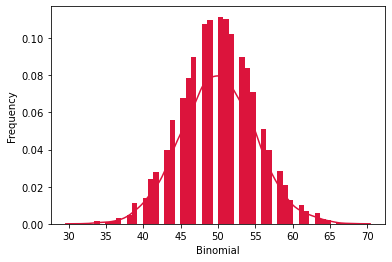

In [ ]:
b_data = binom.rvs(n=100, p=0.5, size=10000)
ax = sns.distplot(b_data, kde=True, color='crimson',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

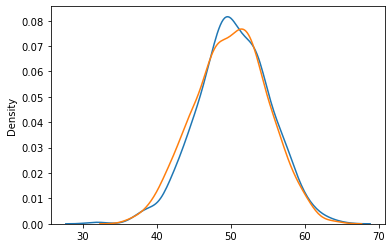

In [ ]:
sns.distplot(np.random.normal(loc=50, scale=5, size=1000), hist=False, label='normal') # loc=평균, scale=표준편차
sns.distplot(np.random.binomial(n=100, p=0.5, size=1000), hist=False, label='binomial')

## 이항분포와 포아송분포

[Text(0.5, 0, 'Binomial'), Text(0, 0.5, 'Frequency')]

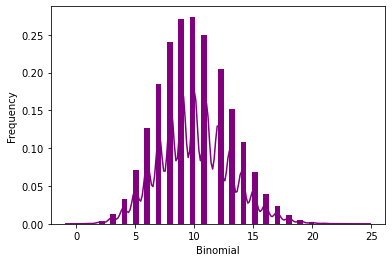

In [ ]:
b_data = binom.rvs(n=100, p=0.1, size=100000)
ax = sns.distplot(b_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

[Text(0.5, 0, 'Poisson'), Text(0, 0.5, 'Frequency')]

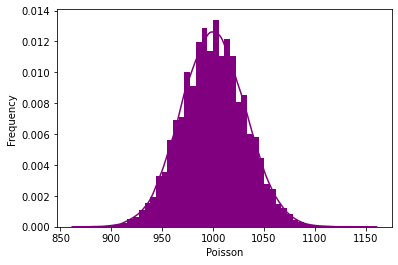

In [ ]:
np = 0.01*100000
p_data = poisson.rvs(mu=np, size=100000)
ax = sns.distplot(p_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Poisson', ylabel='Frequency')

## Uniform distribution

<Axes: ylabel='Density'>

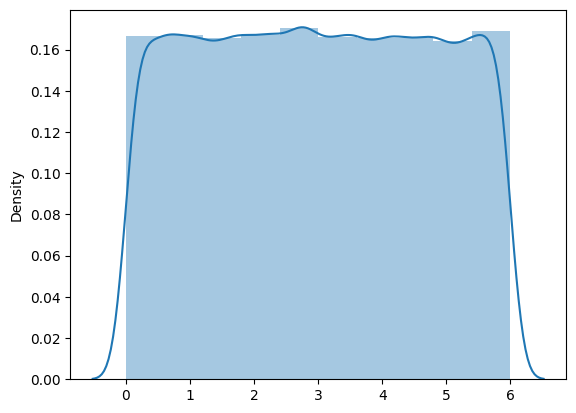

In [ ]:
# Create a uniform distribution with 100 samples between 0 and 1
data = np.random.uniform(low=0, high=6, size=100000)

# Plot the distribution
sns.distplot(data, kde=True, bins=10)

## Normal distribution

In [ ]:
import numpy as np

[Text(0.5, 0, 'Normal'), Text(0, 0.5, 'Frequency')]

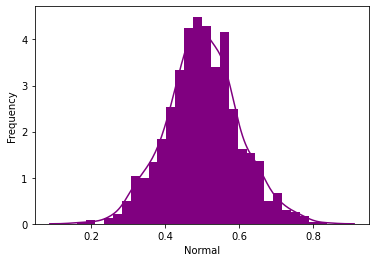

In [ ]:
mu, sigma = 0.5, 0.1
n_data = np.random.normal(mu,sigma, 1000)
ax = sns.distplot(n_data, kde=True, color='purple',
                  hist_kws={'linewidth':25, 'alpha':1})
ax.set(xlabel='Normal', ylabel='Frequency')

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

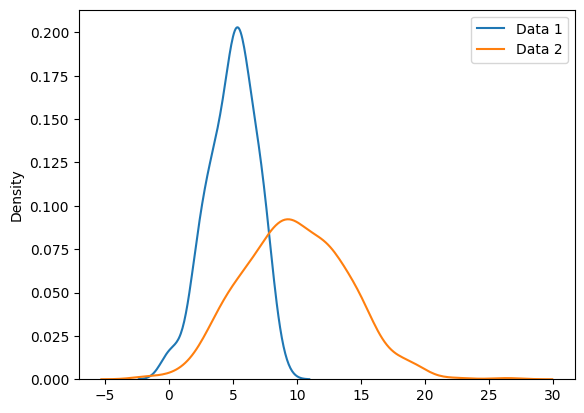

In [ ]:
# prompt: 서로 다른 크기를 가진 2개의 정규분포를 시각화 하고 표준정규분포로 만들어 다시 시각화해다오

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate two normal distributions with different sizes
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=10, scale=4, size=500)

# Plot the two distributions
sns.distplot(data1, hist=False, label='Data 1')
sns.distplot(data2, hist=False, label='Data 2')
plt.legend()
plt.show()

<Axes: ylabel='Density'>

<Axes: ylabel='Density'>

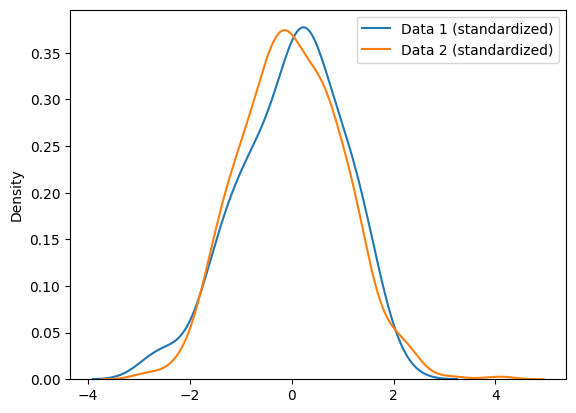

In [ ]:
# Standardize the data
data1_std = (data1 - np.mean(data1)) / np.std(data1)
data2_std = (data2 - np.mean(data2)) / np.std(data2)

# Plot the standardized distributions
sns.distplot(data1_std, hist=False, label='Data 1 (standardized)')
sns.distplot(data2_std, hist=False, label='Data 2 (standardized)')
plt.legend()
plt.show()


## **<font color='red'> Central limit theorem**

<Figure size 1500x800 with 0 Axes>

<Axes: >

(array([1.0572, 0.    , 0.    , 0.    , 0.    , 0.    , 1.0104, 0.    ,
        0.    , 0.    , 0.    , 0.    , 1.0092, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.9954, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.9762, 0.    , 0.    , 0.    , 0.    , 0.9516]),
 array([1.        , 1.16666667, 1.33333333, 1.5       , 1.66666667,
        1.83333333, 2.        , 2.16666667, 2.33333333, 2.5       ,
        2.66666667, 2.83333333, 3.        , 3.16666667, 3.33333333,
        3.5       , 3.66666667, 3.83333333, 4.        , 4.16666667,
        4.33333333, 4.5       , 4.66666667, 4.83333333, 5.        ,
        5.16666667, 5.33333333, 5.5       , 5.66666667, 5.83333333,
        6.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, '1 dice')

Text(0.5, 0, 'Sum')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([0.0828, 0.    , 0.    , 0.1599, 0.    , 0.    , 0.2319, 0.    ,
        0.    , 0.3282, 0.    , 0.    , 0.4284, 0.    , 0.    , 0.5253,
        0.    , 0.    , 0.402 , 0.    , 0.    , 0.3426, 0.    , 0.    ,
        0.2514, 0.    , 0.    , 0.1581, 0.    , 0.0894]),
 array([ 2.        ,  2.33333333,  2.66666667,  3.        ,  3.33333333,
         3.66666667,  4.        ,  4.33333333,  4.66666667,  5.        ,
         5.33333333,  5.66666667,  6.        ,  6.33333333,  6.66666667,
         7.        ,  7.33333333,  7.66666667,  8.        ,  8.33333333,
         8.66666667,  9.        ,  9.33333333,  9.66666667, 10.        ,
        10.33333333, 10.66666667, 11.        , 11.33333333, 11.66666667,
        12.        ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, '2 dice')

Text(0.5, 0, 'Sum')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([0.0098, 0.    , 0.0234, 0.    , 0.056 , 0.    , 0.0996, 0.    ,
        0.136 , 0.    , 0.1992, 0.    , 0.242 , 0.    , 0.246 , 0.    ,
        0.2478, 0.    , 0.2246, 0.    , 0.2012, 0.    , 0.1326, 0.    ,
        0.0964, 0.    , 0.0492, 0.    , 0.0278, 0.0084]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,
         8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5,
        14. , 14.5, 15. , 15.5, 16. , 16.5, 17. , 17.5, 18. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, '3 dice')

Text(0.5, 0, 'Sum')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([1.53846154e-04, 2.30769231e-04, 3.84615385e-04, 2.30769231e-03,
        3.23076923e-03, 3.84615385e-03, 1.84615385e-02, 1.36153846e-02,
        2.03076923e-02, 2.43076923e-02, 7.08461538e-02, 4.33846154e-02,
        4.86153846e-02, 1.03384615e-01, 5.50000000e-02, 5.53846154e-02,
        1.01769231e-01, 4.56923077e-02, 3.80000000e-02, 3.35384615e-02,
        4.40000000e-02, 1.49230769e-02, 1.01538462e-02, 1.08461538e-02,
        2.92307692e-03, 1.38461538e-03, 2.07692308e-03, 3.84615385e-04,
        0.00000000e+00, 7.69230769e-05]),
 array([16. , 17.3, 18.6, 19.9, 21.2, 22.5, 23.8, 25.1, 26.4, 27.7, 29. ,
        30.3, 31.6, 32.9, 34.2, 35.5, 36.8, 38.1, 39.4, 40.7, 42. , 43.3,
        44.6, 45.9, 47.2, 48.5, 49.8, 51.1, 52.4, 53.7, 55. ]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, '10 dice')

Text(0.5, 0, 'Sum')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([4.28571429e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.28571429e-05, 4.28571429e-05, 4.71428571e-04, 5.57142857e-04,
        1.84285714e-03, 4.28571429e-03, 5.70000000e-03, 8.18571429e-03,
        2.15142857e-02, 2.19000000e-02, 2.62285714e-02, 4.86428571e-02,
        3.74571429e-02, 4.18285714e-02, 5.82000000e-02, 3.60428571e-02,
        3.06857143e-02, 3.53142857e-02, 1.68857143e-02, 1.26000000e-02,
        1.15285714e-02, 3.90000000e-03, 2.18571429e-03, 1.67142857e-03,
        5.57142857e-04, 2.57142857e-04]),
 array([ 46.        ,  48.33333333,  50.66666667,  53.        ,
         55.33333333,  57.66666667,  60.        ,  62.33333333,
         64.66666667,  67.        ,  69.33333333,  71.66666667,
         74.        ,  76.33333333,  78.66666667,  81.        ,
         83.33333333,  85.66666667,  88.        ,  90.33333333,
         92.66666667,  95.        ,  97.33333333,  99.66666667,
        102.        , 104.33333333, 106.66666667, 109.        ,
      

Text(0.5, 1.0, '25 dice')

Text(0.5, 0, 'Sum')

Text(0, 0.5, 'Frequency')

<Axes: >

(array([3.15789474e-05, 0.00000000e+00, 6.31578947e-05, 6.31578947e-05,
        1.26315789e-04, 3.47368421e-04, 1.01052632e-03, 1.89473684e-03,
        2.77894737e-03, 5.81052632e-03, 8.17894737e-03, 1.13368421e-02,
        2.14736842e-02, 2.32736842e-02, 2.49157895e-02, 3.07578947e-02,
        3.14842105e-02, 3.04736842e-02, 3.62526316e-02, 2.47263158e-02,
        1.99894737e-02, 1.41157895e-02, 1.00105263e-02, 6.78947368e-03,
        5.68421053e-03, 1.92631579e-03, 1.13684211e-03, 6.94736842e-04,
        2.84210526e-04, 1.57894737e-04]),
 array([122.        , 125.16666667, 128.33333333, 131.5       ,
        134.66666667, 137.83333333, 141.        , 144.16666667,
        147.33333333, 150.5       , 153.66666667, 156.83333333,
        160.        , 163.16666667, 166.33333333, 169.5       ,
        172.66666667, 175.83333333, 179.        , 182.16666667,
        185.33333333, 188.5       , 191.66666667, 194.83333333,
        198.        , 201.16666667, 204.33333333, 207.5       ,
      

Text(0.5, 1.0, '50 dice')

Text(0.5, 0, 'Sum')

Text(0, 0.5, 'Frequency')

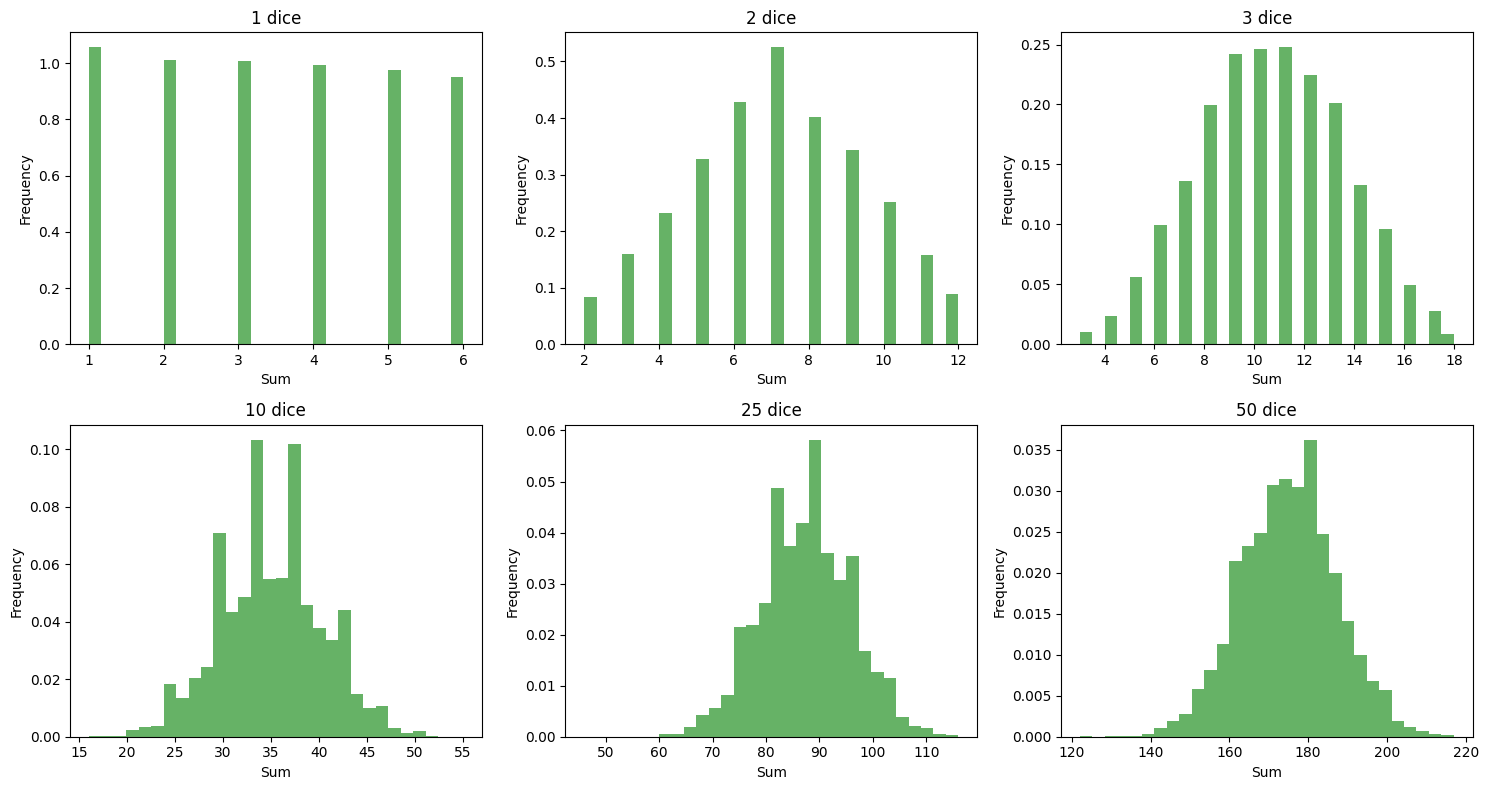

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 주사위를 던지는 함수
def roll_dice(num_rolls, num_dice):
    return np.sum(np.random.randint(1, 7, (num_rolls, num_dice)), axis=1)

# 주사위를 던지는 횟수와 주사위 개수 설정
num_rolls = 10000  # 주사위를 던지는 횟수 (표본 크기)
num_dice_list = [1, 2, 3, 10, 25, 50]  # 주사위 개수 목록

# 히스토그램을 그리기 위한 설정
plt.figure(figsize=(15, 8))

# 각 주사위 개수에 대해 시뮬레이션 실행
for i, num_dice in enumerate(num_dice_list, 1):
    sums = roll_dice(num_rolls, num_dice)
    plt.subplot(2, 3, i)
    plt.hist(sums, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'{num_dice} dice')
    plt.xlabel('Sum')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
def ProbWinMatch(pmf):
    total = 0
    for p, prob in pmf.Items():
        total += prob * (1-p)**3
    return total

(array([0.02972426, 0.05944851, 0.17834553, 0.20806979, 0.95117618,
        1.21869448, 1.42676426, 2.64545874, 3.65608343, 4.45863833,
        3.92360173, 4.01277449, 2.61573448, 1.42676426, 1.51593703,
        0.62420937, 0.32696681, 0.2675183 , 0.14862128, 0.02972426]),
 array([0.16301119, 0.19665375, 0.2302963 , 0.26393886, 0.29758142,
        0.33122398, 0.36486654, 0.3985091 , 0.43215165, 0.46579421,
        0.49943677, 0.53307933, 0.56672189, 0.60036445, 0.634007  ,
        0.66764956, 0.70129212, 0.73493468, 0.76857724, 0.8022198 ,
        0.83586235]),
 <BarContainer object of 20 artists>)

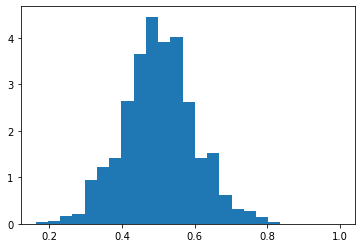

In [ ]:
plt.hist(n_data, 20, density=True) # y축을 normalize해줌
bins=1
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))* np.exp(-(bins-mu)**2/(2*sigma**2)),
         linewidth=3, color='y')

# <font color='red'> 2. Probability mass fuction

In [ ]:
np.random.randint(10)

7

In [ ]:
m = np.random.randint(2, 10, 40)
size = len(m)
m

array([6, 8, 4, 3, 8, 6, 7, 2, 6, 5, 2, 2, 7, 3, 5, 4, 2, 7, 3, 6, 7, 9,
       9, 6, 5, 4, 3, 2, 5, 2, 2, 7, 6, 6, 4, 9, 2, 4, 9, 3])

In [ ]:
import pandas as pd

<AxesSubplot:>

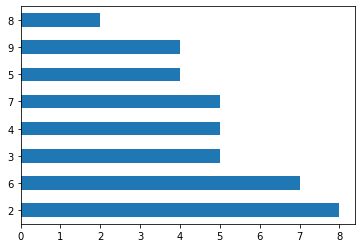

In [ ]:
df = pd.DataFrame(m)
df[0].value_counts().plot(kind='barh')

In [ ]:
data = pd.DataFrame(df[0].value_counts())
data

,0
2,8
6,7
3,5
4,5
7,5
5,4
9,4
8,2


In [ ]:
data.columns = ['counts']
data

,counts
2,8
6,7
3,5
4,5
7,5
5,4
9,4
8,2


In [ ]:
data['prob'] = data['counts']/size
data

,counts,prob
2,8,0.200
6,7,0.175
3,5,0.125
4,5,0.125
7,5,0.125
5,4,0.100
9,4,0.100
8,2,0.050


<BarContainer object of 8 artists>

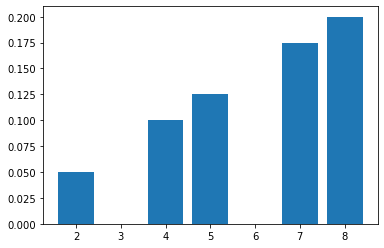

In [ ]:
plt.bar(data['counts'], data['prob']) # probability mass function

<AxesSubplot:xlabel='counts', ylabel='prob'>

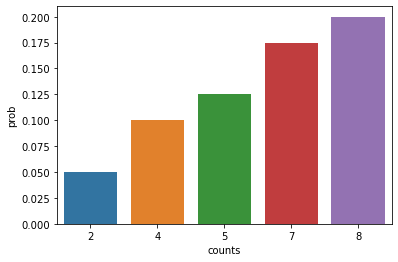

In [ ]:
sns.barplot(data['counts'], data['prob'])

In [ ]:
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

In [ ]:
summary(tips)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
total_bill,float64,0,0.0,229
tip,float64,0,0.0,123
sex,category,0,0.0,2
smoker,category,0,0.0,2
day,category,0,0.0,4
time,category,0,0.0,2
size,int64,0,0.0,6


In [ ]:
data = tips[['day','tip', 'size']].groupby('day').tip.agg(['sum', 'count'])
data

,sum,count
day,,
Thur,171.83,62
Fri,51.96,19
Sat,260.40,87
Sun,247.39,76


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data

,day,sum,count
0,Thur,171.83,62
1,Fri,51.96,19
2,Sat,260.40,87
3,Sun,247.39,76


In [ ]:
data['pmf'] = data['count']/data['count'].sum()
data['pmf'].sum()
data

1.0

,day,sum,count,pmf
0,Thur,171.83,62,0.254098
1,Fri,51.96,19,0.077869
2,Sat,260.40,87,0.356557
3,Sun,247.39,76,0.311475


<AxesSubplot:xlabel='day', ylabel='pmf'>

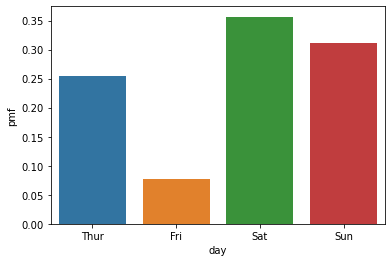

In [ ]:
sns.barplot(data['day'], data['pmf'])

# <font color='red'> 3. Probability density fuction

<AxesSubplot:ylabel='Density'>

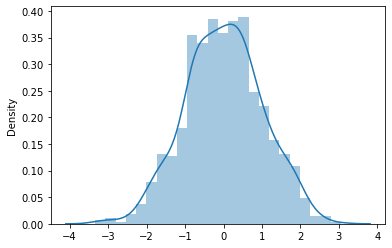

In [ ]:
data= np.random.normal(size=1000)
data = np.append(data, [1.5, 1.5, 1.5])
sns.distplot(data)

In [ ]:
mu = 20
sigma = 2
h = sorted(np.random.normal(mu, sigma, 1000))

(array([ 10.,  35.,  96., 173., 238., 217., 150.,  57.,  21.,   3.]),
 array([18.10959124, 19.34782158, 20.58605193, 21.82428227, 23.06251261,
        24.30074295, 25.53897329, 26.77720363, 28.01543398, 29.25366432,
        30.49189466]),
 <BarContainer object of 10 artists>)

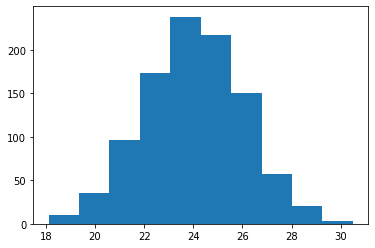

In [ ]:
plt.hist(np.random.normal(mu, sigma, 1000))

In [ ]:
mu = 24
sigma = 2
ah = sorted(np.random.normal(mu, sigma, 100))

(array([  1.,  10.,  44., 135., 221., 276., 174., 104.,  26.,   9.]),
 array([12.54453779, 13.9550976 , 15.36565742, 16.77621723, 18.18677705,
        19.59733686, 21.00789668, 22.41845649, 23.82901631, 25.23957612,
        26.65013594]),
 <BarContainer object of 10 artists>)

(array([ 1.,  2.,  8.,  9., 15., 20., 19., 16.,  8.,  2.]),
 array([18.58308707, 19.53534986, 20.48761266, 21.43987545, 22.39213825,
        23.34440104, 24.29666384, 25.24892663, 26.20118943, 27.15345222,
        28.10571502]),
 <BarContainer object of 10 artists>)

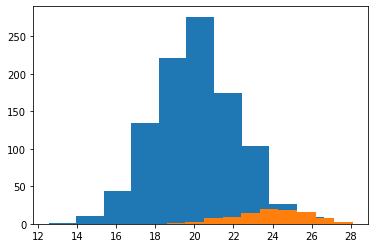

In [ ]:
plt.hist(h)
plt.hist(ah)

In [ ]:
import scipy.stats as stats

In [ ]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) # it is a fitting!

<Figure size 720x216 with 0 Axes>

(array([0.02182915, 0.10914577, 0.07640204, 0.16371866, 0.26194986,
        0.22920613, 0.13097493, 0.05457289, 0.03274373, 0.01091458]),
 array([15.82373502, 16.7399409 , 17.65614677, 18.57235265, 19.48855853,
        20.4047644 , 21.32097028, 22.23717615, 23.15338203, 24.06958791,
        24.98579378]),
 <BarContainer object of 10 artists>)

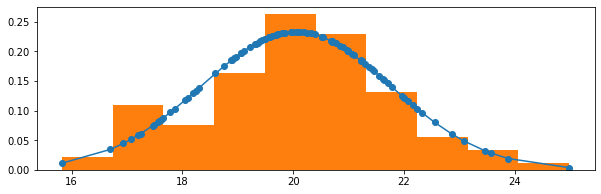

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(h, fit, '-o')
plt.hist(h, density=True)

# <font color='red'> 4. Cumulative distribution fuction

In [ ]:
import scipy.stats as stats

In [ ]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

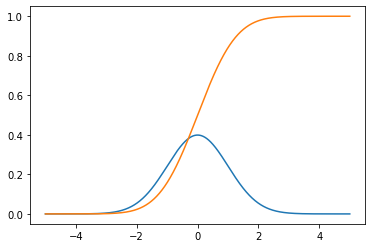

In [ ]:
plt.plot(x, pdf, label='pdf')
plt.plot(x, cdf, label='cdf')

In [ ]:
pdf.shape

(5000,)

(array([0.04325186, 0.04325186, 0.11894261, 0.11894261, 0.23788522,
        0.10812964, 0.17300743, 0.09731668, 0.10812964, 0.03243889]),
 array([15.04165625, 15.96647202, 16.89128779, 17.81610357, 18.74091934,
        19.66573512, 20.59055089, 21.51536667, 22.44018244, 23.36499822,
        24.28981399]),
 <BarContainer object of 10 artists>)

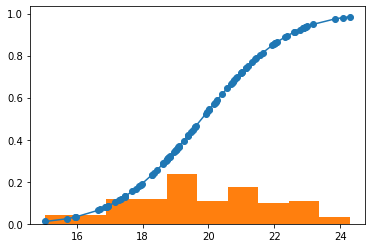

In [ ]:
fit = stats.norm.cdf(h, np.mean(h), np.std(h)) # it is a fitting!

plt.plot(h, fit, '-o')
plt.hist(h, density=True)

# 2 주차 End